In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization Library
import seaborn as sns #visualization Library

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/treadmill-company-dataset/aerofit.txt


In [10]:
df = pd.read_csv('/kaggle/input/treadmill-company-dataset/aerofit.txt')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


What the Columns represents in the Dataset

● Product: Product Purchased KP281, KP481, or KP781

● Age: In years

● Gender: Male/Female

● Education: in years

● MaritalStatus: single or partnered

● Usage: average number of times the customer plans to use the treadmill each week

● Income: annual income (in $)

● Fitness: self-rated fitness on a 1-to-5 scale, where 1 is poor shape and 5 is the excellent shape.

● Miles: average number of miles the customer expects to walk/run each week

In [13]:
#shape of the Dataset
df.shape

(180, 9)

In [14]:
# Checking the Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [15]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [16]:
# Number of Unique Values in each Column

for i in df.columns:
  print(i , ':' , df[i].nunique())


Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


From the above observation, we can conclude that only Income, Age and Miles can be considered as Contineous, rest of the columns though interger/float should be considered as Catergories.

In [17]:
# Checking for the Null Values
# df.isna().sum()

df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

As we can observe there aren't any Missing values in the Dataset.

### Checking the Value Count for Categorical Columns

In [18]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [19]:
df['Education'].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

In [20]:
df['Usage'].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [21]:
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [22]:
df['Usage'].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [23]:
df['Fitness'].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [26]:
# Correlating between the columns of Dataset for a broader perspective.
# Creating a copy of dataframe

df_copy = df.copy()

df_copy['Gender'].replace(['Male', 'Female'], [1,0], inplace= True)

df_copy['MaritalStatus'].replace(['Single', 'Partnered'], [0,1], inplace= True)

df_copy['Product'].replace(['KP281', 'KP481', 'KP781'], [0,1,2], inplace= True)

df_copy.corr()
#ignore the Python Warnings

/tmp/ipykernel_33/1340074713.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Gender'].replace(['Male', 'Female'], [1,0], inplace= True)
/tmp/ipykernel_33/1340074713.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Gender'].replace(['Male', 'Female'], [1,0], inplace= True)
/t

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.032225,0.230653,0.495018,-0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.032225,1.000000,0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.230653,0.027544,1.000000,0.094089,-0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.495018,0.280496,0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,-0.017602,0.192152,-0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.537447,0.015064,0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.594883,0.061105,0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.624168,0.513414,0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.571596,0.036618,0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


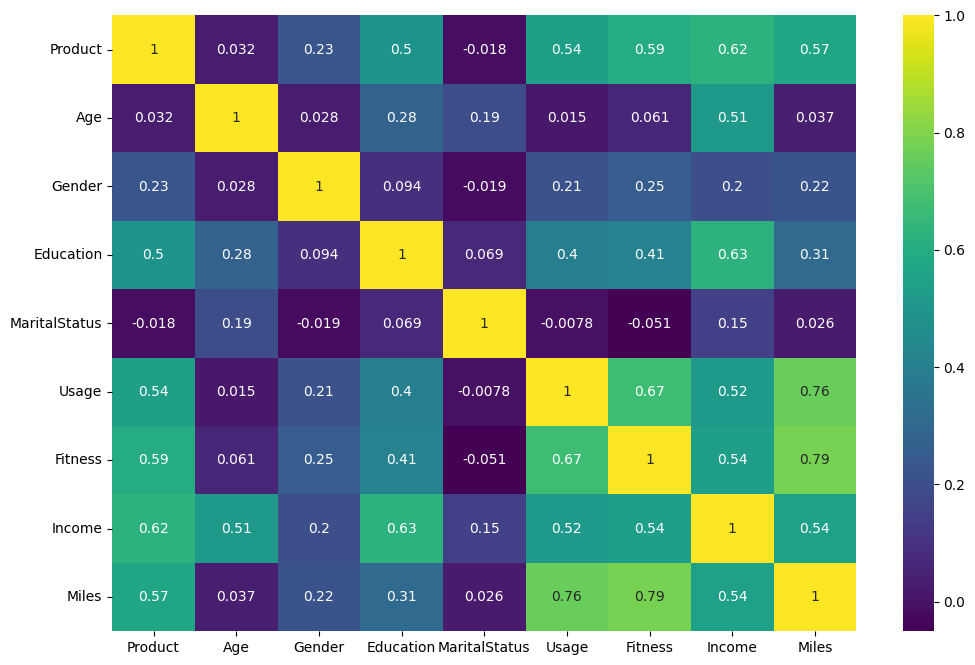

In [27]:
# Correlation plot Above as Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df_copy.corr(), cmap = "viridis", annot= True )
plt.show()

# **Insights from the Heatmap**

**Notewothy Points**
1.   The product treadmill purchased highly correlates with Education, Usage, Fitness, Income and Miles(distance covered).
2.   Age is highly correlated to income(0.51) which definitely seems reasonable.
3.   Gender has some correlation to Usage, Fitness, Income and Miles.
4.   Education is correlated to Age and Miles. It's highly correlated to Income (this is obvious). It's sufficiently correlated to Usage and Fitness too.
5.   Maritial Status has some correlation to Age and Income.
6.   Usage is highly correlated to Fitness, Miles and Income. Its correlated but not much with Education.
7.   Fitness is highly realted with Usage and Miles with is also obvious which is more you use the product the more Fit you become. And Income and Education is correlated.
8.   Income is highly correlated with Age, Education, Usage , Fitness and Miles.
9.   Miles is highly correlated with Usage, Fitness and Income. Its has some correlation with Gender and Education.

**More Observations and Possiblilties:-**



1.   Product, Fitness, Usage and Miles depict a ridiculously higher correlation among themselves which looks as expected since more the usage implying more miles run and certainly more fitness.
2.   Also a story which seems reasonable is that Age and Education are indicators of Income which affects the products bought.









**Observing the Outliers of Age, Income and Miles**

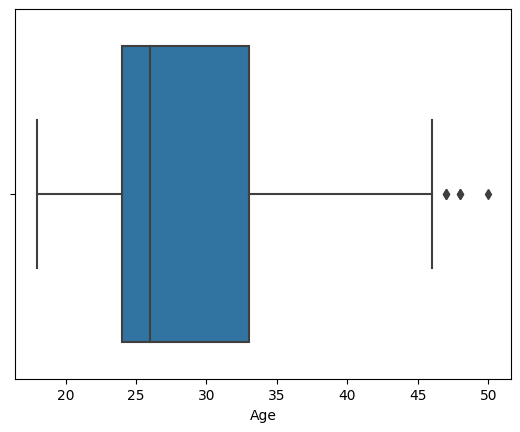

In [28]:
ax = sns.boxplot(x = df['Age'])
plt.show()

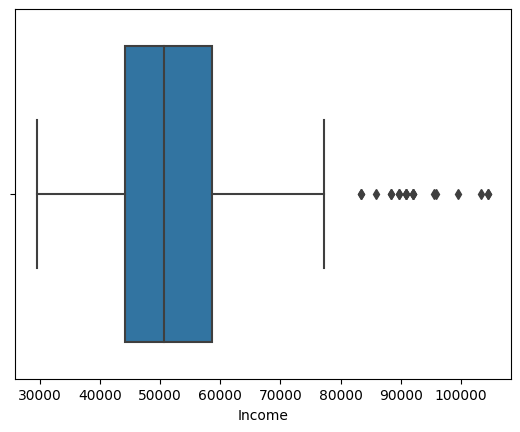

In [29]:
ax = sns.boxplot(x = df['Income'])
plt.show()

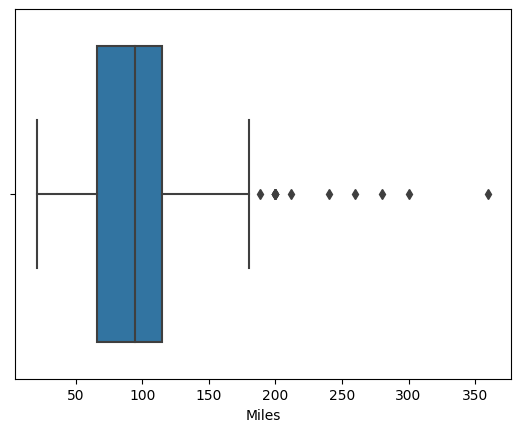

In [30]:
ax = sns.boxplot(x = df['Miles'])
plt.show()

There are outliers in our data. When we remove them, this leads to loss of information and moreover we have a very small dataset of 180 rows. So instead of removing, its foing to be clipped(i.e. -ranges between 5 percentile to 96 percentile).



In [31]:
num_feat = ['Age', 'Income', 'Miles']
for col in num_feat:
  percentiles = df[col].quantile([0.05,0.95]).values
  df_copy[col] = np.clip(df_copy[col], percentiles[0], percentiles[1])

In [32]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

# Scatterplots for Analysis of Continuous Variables

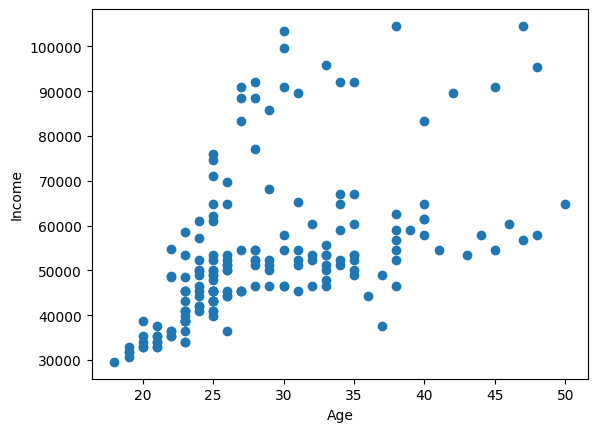

In [33]:
# Obsevrving the Association between Age and Income - 
plt.scatter(df['Age'], df['Income'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

There is a cone like structure inthe ScatterPlot which when goggled comes out to be Heteroscedastic. --> situations where the variance of the residuals is unequal over a range of measured values. When running a regression analysis, heteroskedasticity results in an unequal scatter of the residuals (also known as the error term).

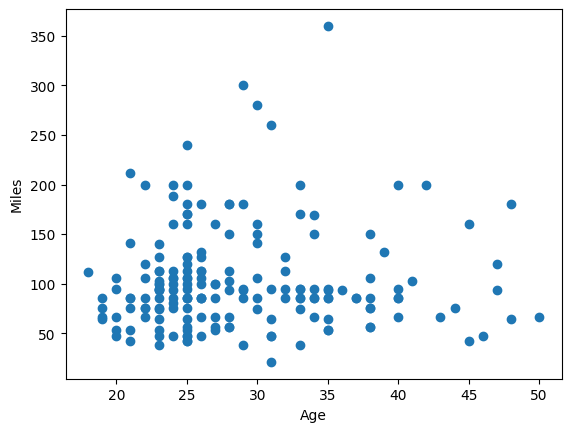

In [34]:
# Obsevrving the Association between Age and Miles - 
plt.scatter(df['Age'], df['Miles'])
plt.xlabel("Age")
plt.ylabel("Miles")
plt.show()

No such significant pattern or observation between Age and Miles run on a treadmill, also implied by heatmap with a correlation of 0.037.

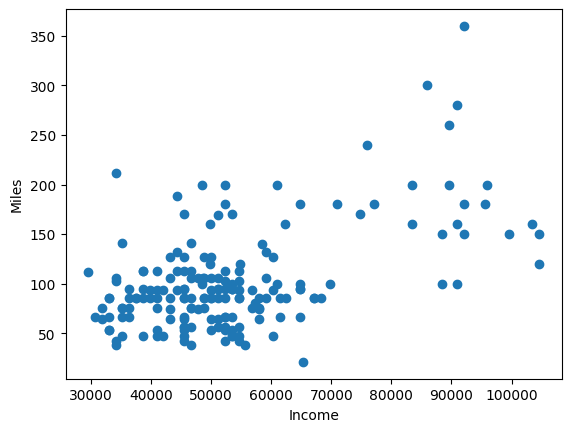

In [35]:
# Obsevrving the Association between Income and Miles - 
plt.scatter(df['Income'], df['Miles'])
plt.xlabel("Income")
plt.ylabel("Miles")
plt.show()

The Miles ran on treadmill increase significantly with income, infact only people having income above 70000 have run over 220 Miles.


/tmp/ipykernel_33/2219672967.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], hist= True, kde= True,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


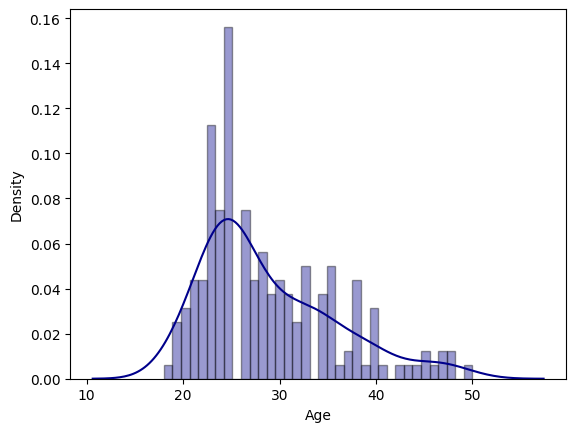

In [37]:
# Observing the Ages to create Bins - 

sns.distplot(df['Age'], hist= True, kde= True,
             bins = int(36), color = 'darkblue',hist_kws={'edgecolor':'black',
                       'linewidth':1})
plt.show()

In [38]:
#create bins on intervals of 5 as per Age gaps ans below 20, above 40->

bins = [-1, 20,25,30,35,40,55]
labels= ['<20','20-25','25-30','30-35','35-40','40+']
df['Age_bins'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20
1,KP281,19,Male,15,Single,2,3,31836,75,<20
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20
3,KP281,19,Male,12,Single,3,3,32973,85,<20
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20
5,KP281,20,Female,14,Partnered,3,3,32973,66,<20
6,KP281,21,Female,14,Partnered,3,3,35247,75,20-25
7,KP281,21,Male,13,Single,3,3,32973,85,20-25
8,KP281,21,Male,15,Single,5,4,35247,141,20-25
9,KP281,21,Female,15,Partnered,2,3,37521,85,20-25


/tmp/ipykernel_33/1910316789.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], hist= True, kde= True,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


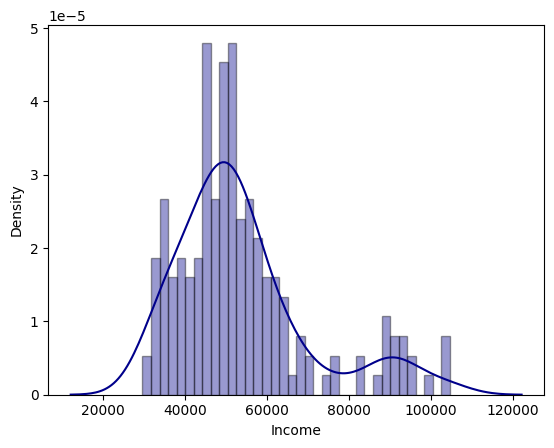

In [39]:
# Observing the income to create Bins - 

sns.distplot(df['Income'], hist= True, kde= True,
             bins = int(36), color = 'darkblue',hist_kws={'edgecolor':'black',
                       'linewidth':1})

plt.show()

In [40]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [41]:
#Create Bins for Incomes-->

bins = [-1, 35000,45000,50000,60000,70000,120000]
labels= ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','120000+']
df['Income_bins'] = pd.cut(df['Income'], bins=bins, labels=labels)
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000
5,KP281,20,Female,14,Partnered,3,3,32973,66,<20,<35000
6,KP281,21,Female,14,Partnered,3,3,35247,75,20-25,35000-45000
7,KP281,21,Male,13,Single,3,3,32973,85,20-25,<35000
8,KP281,21,Male,15,Single,5,4,35247,141,20-25,35000-45000
9,KP281,21,Female,15,Partnered,2,3,37521,85,20-25,35000-45000


/tmp/ipykernel_33/272673571.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Miles'], hist= True, kde= True,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


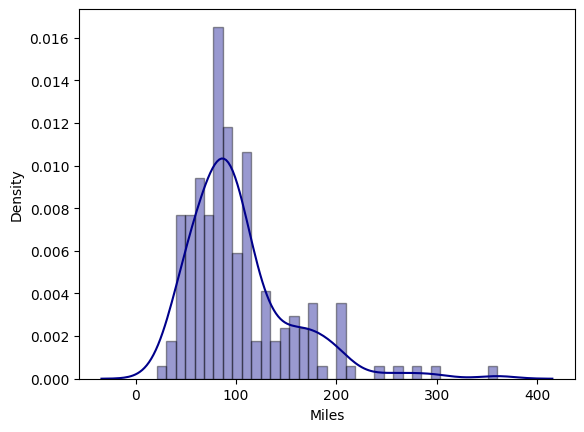

In [42]:
# Observing the Miles to create Bins - 

sns.distplot(df['Miles'], hist= True, kde= True,
             bins = int(36), color = 'darkblue',hist_kws={'edgecolor':'black',
                       'linewidth':1})

plt.show()

In [43]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [46]:
#Create Bins for Miles-->

bins = [-1, 50,100,150,400]
labels= ['<50','50-100','100-150','150+']
df['Miles_bins'] = pd.cut(df['Miles'], bins=bins, labels=labels)
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Miles_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50
5,KP281,20,Female,14,Partnered,3,3,32973,66,<20,<35000,50-100
6,KP281,21,Female,14,Partnered,3,3,35247,75,20-25,35000-45000,50-100
7,KP281,21,Male,13,Single,3,3,32973,85,20-25,<35000,50-100
8,KP281,21,Male,15,Single,5,4,35247,141,20-25,35000-45000,100-150
9,KP281,21,Female,15,Partnered,2,3,37521,85,20-25,35000-45000,50-100


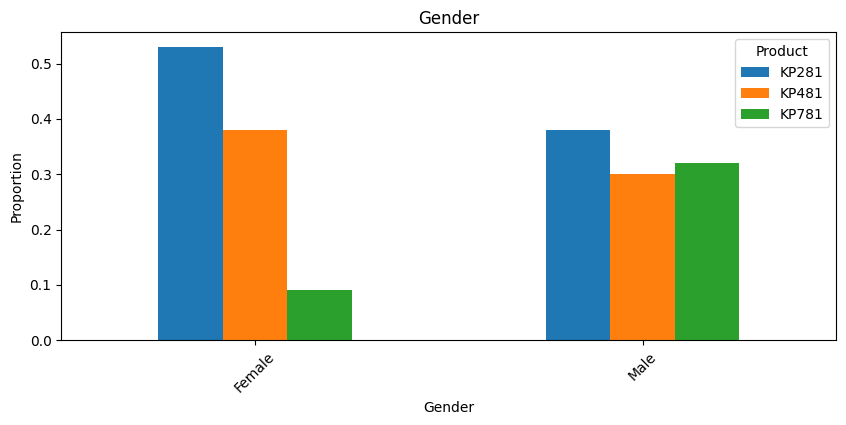

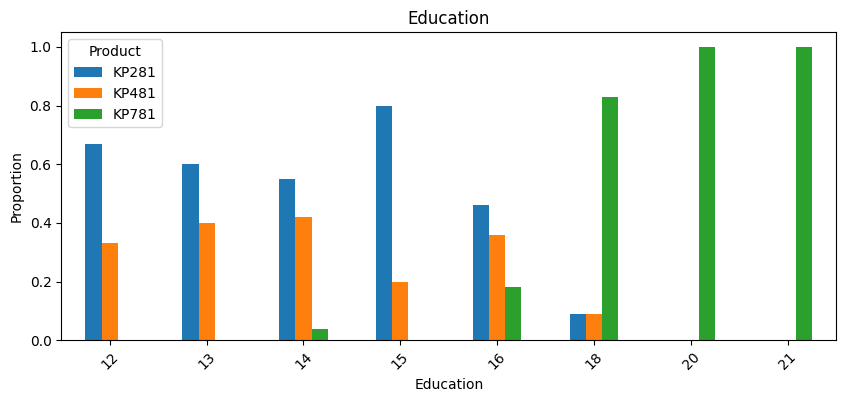

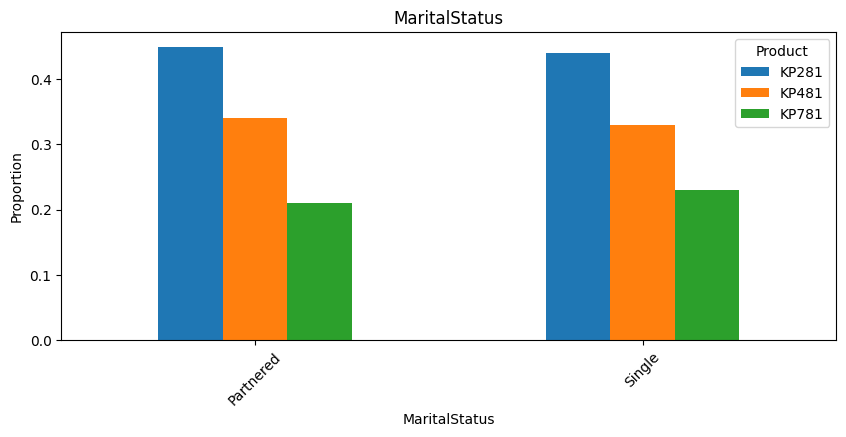

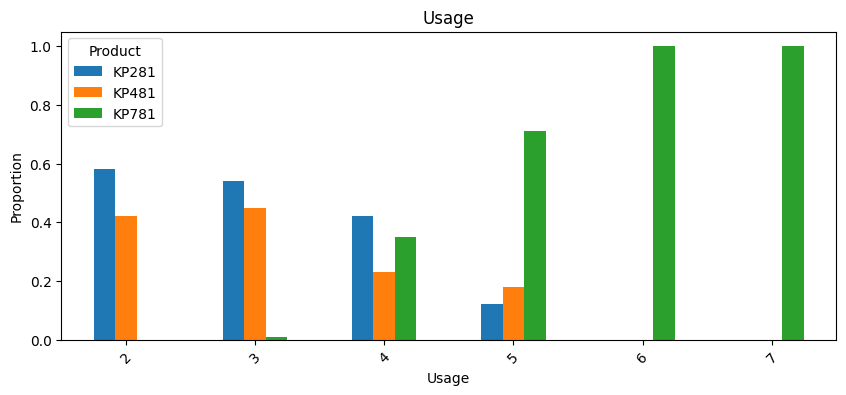

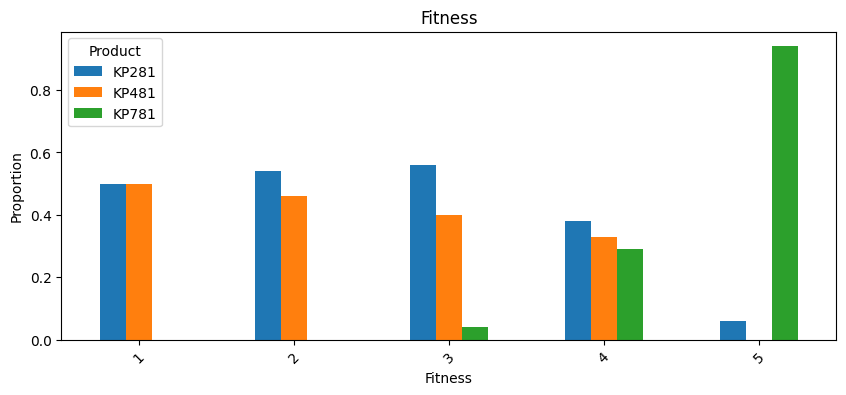

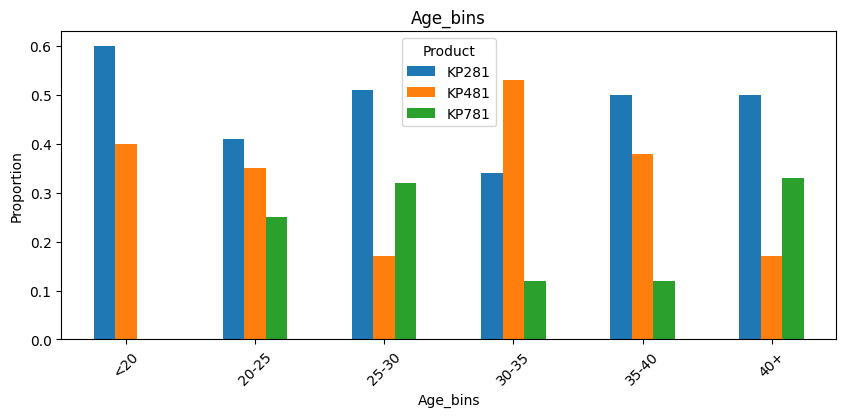

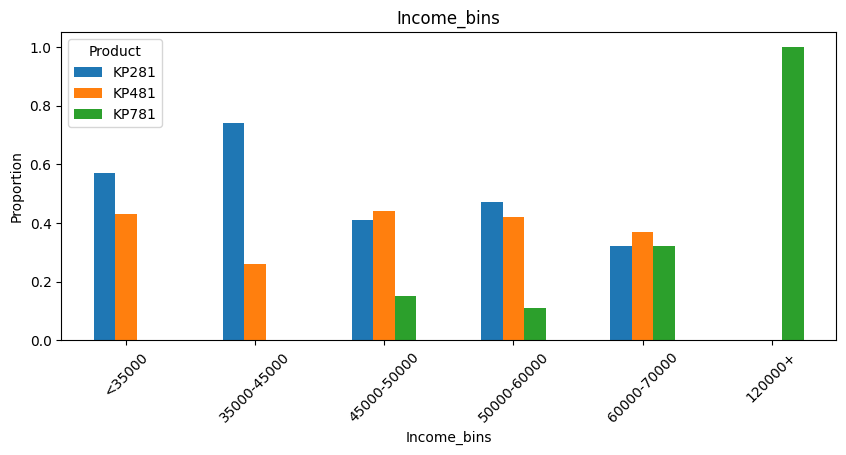

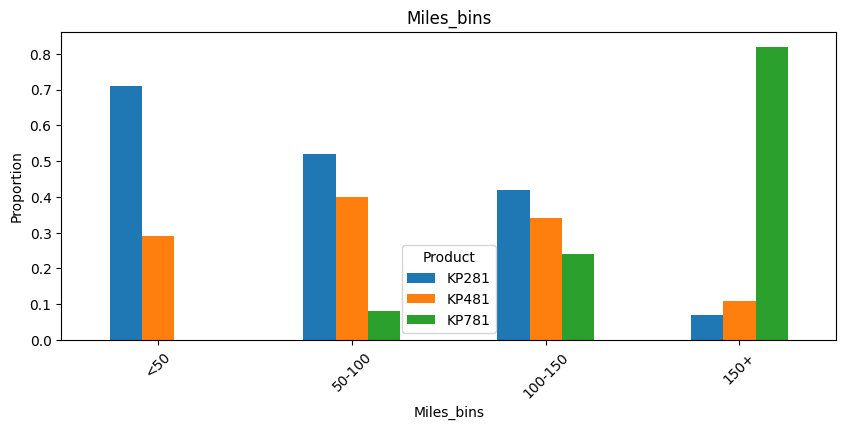

In [48]:
# Crosstabs -

cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_bins','Income_bins','Miles_bins']
for i in cat_cols:
    other= round(pd.crosstab(df[df[i].notnull()][i], df['Product']).\
                 div(pd.crosstab(df[df[i].notnull()][i],df['Product']).apply(sum,1),0),2)
    ax = other.plot(kind ='bar', title = i, figsize = (10,4))
    ax.set_xlabel(i)
    ax.set_ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()